In [1]:
import pandas as pd

## Milestone 2, Task 3:
Create a function which will load a dataset from a csv file into a Pandas df.

In [2]:
def create_df(file_path):
    df = pd.read_csv(file_path)
    print(df.shape)
    return df

In [3]:
file_path = 'C:/Users/Chris/Documents/AiCoreEDA_Project/customer_activity.csv'

df = create_df(file_path)
df

(12330, 17)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.000000,0,0.00,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.000000,0,0.00,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.400000,0,0.00,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.000000,0,0.00,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.000000,0,0.00,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,NaN,134.000000,4,112.22,48.0,1898.0,0.0030,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5.0,NaN,1,0.00,67.0,2202.0,0.0276,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0.0,0.000000,0,0.00,13.0,316.0,0.0000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False
12328,5.0,98.000000,0,0.00,46.0,1469.0,0.0442,0.069,0.0,Sep,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False


## Milestone 3, Task 1:
Check for null values and data types:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            11760 non-null  float64
 1   administrative_duration   11418 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    11994 non-null  float64
 4   product_related           11751 non-null  float64
 5   product_related_duration  12129 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   month                     12330 non-null  object 
 10  operating_systems         12319 non-null  object 
 11  browser                   12330 non-null  object 
 12  region                    12330 non-null  object 
 13  traffic_type              12330 non-null  object 
 14  visito

Identifying Dtype to change:
- numerical columns to int/float? can we use int32/float32 to save memory?
- administrative_duration, informational_duration and product_related_durationto datetime64?
- product_related to int?
- month to datetime64 or period?
- operating_system, browser, region, traffic_type and visitor_type to category


Create a DataTransform class to handle the conversion of column data types:

In [5]:
from transformations import DataTransform

In [6]:
transform_instance = DataTransform(df)
transform_instance.to_category('traffic_type', 'operating_systems', 'browser', 'region', 'visitor_type')
transform_instance.to_datetime('administrative_duration', 'informational_duration', 'product_related_duration')
transform_instance.to_Int('administrative','product_related')

In [7]:
df.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0 days 00:00:00,0,0 days,4,0 days 00:00:00,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0 days 00:00:00,0,0 days,26,0 days 00:14:36,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,0 days 00:01:39.400000,0,0 days,19,0 days 00:06:08,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0 days 00:00:00,0,0 days,20,0 days 00:23:52,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0 days 00:00:00,0,0 days,33,0 days 00:11:34,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            11760 non-null  Int64          
 1   administrative_duration   11418 non-null  timedelta64[ns]
 2   informational             12330 non-null  int64          
 3   informational_duration    11994 non-null  timedelta64[ns]
 4   product_related           11751 non-null  Int64          
 5   product_related_duration  12129 non-null  timedelta64[ns]
 6   bounce_rates              12330 non-null  float64        
 7   exit_rates                12330 non-null  float64        
 8   page_values               12330 non-null  float64        
 9   month                     12330 non-null  object         
 10  operating_systems         12319 non-null  category       
 11  browser                   12330 non-null  category       
 12  regi

### Results:
All changed data types, except product_related which is now Int64 (note capital "I") which is a nullable array. 


# Milestone 3, Task 2: 
Create a class to get information from the df:

In [9]:
from df_info import DataFrameInfo

info = DataFrameInfo(df)

#### Data types:

In [10]:
info.df_data_type()

The data type for each column is listed below:


administrative                        Int64
administrative_duration     timedelta64[ns]
informational                         int64
informational_duration      timedelta64[ns]
product_related                       Int64
product_related_duration    timedelta64[ns]
bounce_rates                        float64
exit_rates                          float64
page_values                         float64
month                                object
operating_systems                  category
browser                            category
region                             category
traffic_type                       category
visitor_type                       category
weekend                                bool
revenue                                bool
dtype: object

#### Stats:

In [11]:
info.df_stats()

A statistical summary of the numerical columns is below:


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values
count,11760.0,11418,12330.000000,11994,11751.0,12129,12330.000000,12330.000000,12330.000000
mean,2.308844,0 days 00:01:24.539078957,0.497080,0 days 00:00:34.486687374,32.814824,0 days 00:19:52.426086239,0.022381,0.042820,5.556310
std,3.364905,0 days 00:02:59.392485097,1.174194,0 days 00:02:16.201556649,44.597841,0 days 00:29:27.243801709,0.048847,0.048578,17.397345
min,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00,0.000000,0.000000,0.000000
25%,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,8.0,0 days 00:03:12,0.000000,0.014000,0.000000
50%,1.0,0 days 00:00:06,0.000000,0 days 00:00:00,18.0,0 days 00:09:46,0.003500,0.025000,0.000000
75%,4.0,0 days 00:01:35,0.000000,0 days 00:00:00,38.0,0 days 00:23:45,0.017600,0.049000,0.000000
max,24.0,0 days 00:35:55,12.000000,0 days 00:33:08.750000,485.0,0 days 06:37:46,0.200000,0.200000,254.600000


#### Shape:

In [12]:
info.df_shape()

'The dataset has 12330 columns and 17 rows.'

#### Distinct values for categorical data:

In [13]:
info.df_category_distinct_values()

The frequency of unique values for each column containing categorical data is below:

operating_systems
Windows     6596
MACOS       2676
Android     2584
iOS          385
ChromeOS      62
Ubuntu         9
Other          7
Name: count, dtype: int64

browser
Google Chrome        7721
Safari               2527
Mozilla Firefox       830
Microsoft Edge        582
Internet Explorer     156
Samsung Internet      145
Opera                 136
Android               121
QQ                     53
Sogou Explorer         47
Yandex                  8
UC Browser              2
Undetermined            2
Name: count, dtype: int64

region
North America      4869
Western Europe     2283
Eastern Europe     1154
Asia               1143
South America       913
Africa              770
Northern Africa     499
Southern Africa     423
Oceania             276
Name: count, dtype: int64

traffic_type
Google search          3990
Facebook ads           2322
Instagram ads          2193
Bing search            1174
Yo

#### Null percentages:

In [14]:
info.df_null_info()

For any columns containing null values the percentage of null values for that column is:

administrative is: 4.62 %
administrative_duration is: 7.4 %
informational_duration is: 2.73 %
product_related is: 4.7 %
product_related_duration is: 1.63 %
operating_systems is: 0.09 %


# Milestone 3, Task 3: 
Remove/impute missing values in the data:

In [15]:
from plotter import Plotter

In [16]:
# This function is used to generate useful info on null-values:

def get_null_info(df_name):
    info = DataFrameInfo(df_name)
    df_plots = Plotter(df_name)
    info.df_null_info()
    print()
    print('A matrix to visualize the pattern of missing values in each column:')
    df_plots.missing_no_matrix()
    print()
    print('A heatmap to visualize to visualize the correlation of missingness between every two columns:')
    df_plots.missing_no_heatmap()
    print()
    print('A bar chart to quantify the number of missing values in each column:')
    df_plots.missing_no_bar()

For any columns containing null values the percentage of null values for that column is:

administrative is: 4.62 %
administrative_duration is: 7.4 %
informational_duration is: 2.73 %
product_related is: 4.7 %
product_related_duration is: 1.63 %
operating_systems is: 0.09 %

A matrix to visualize the pattern of missing values in each column:

A heatmap to visualize to visualize the correlation of missingness between every two columns:

A bar chart to quantify the number of missing values in each column:


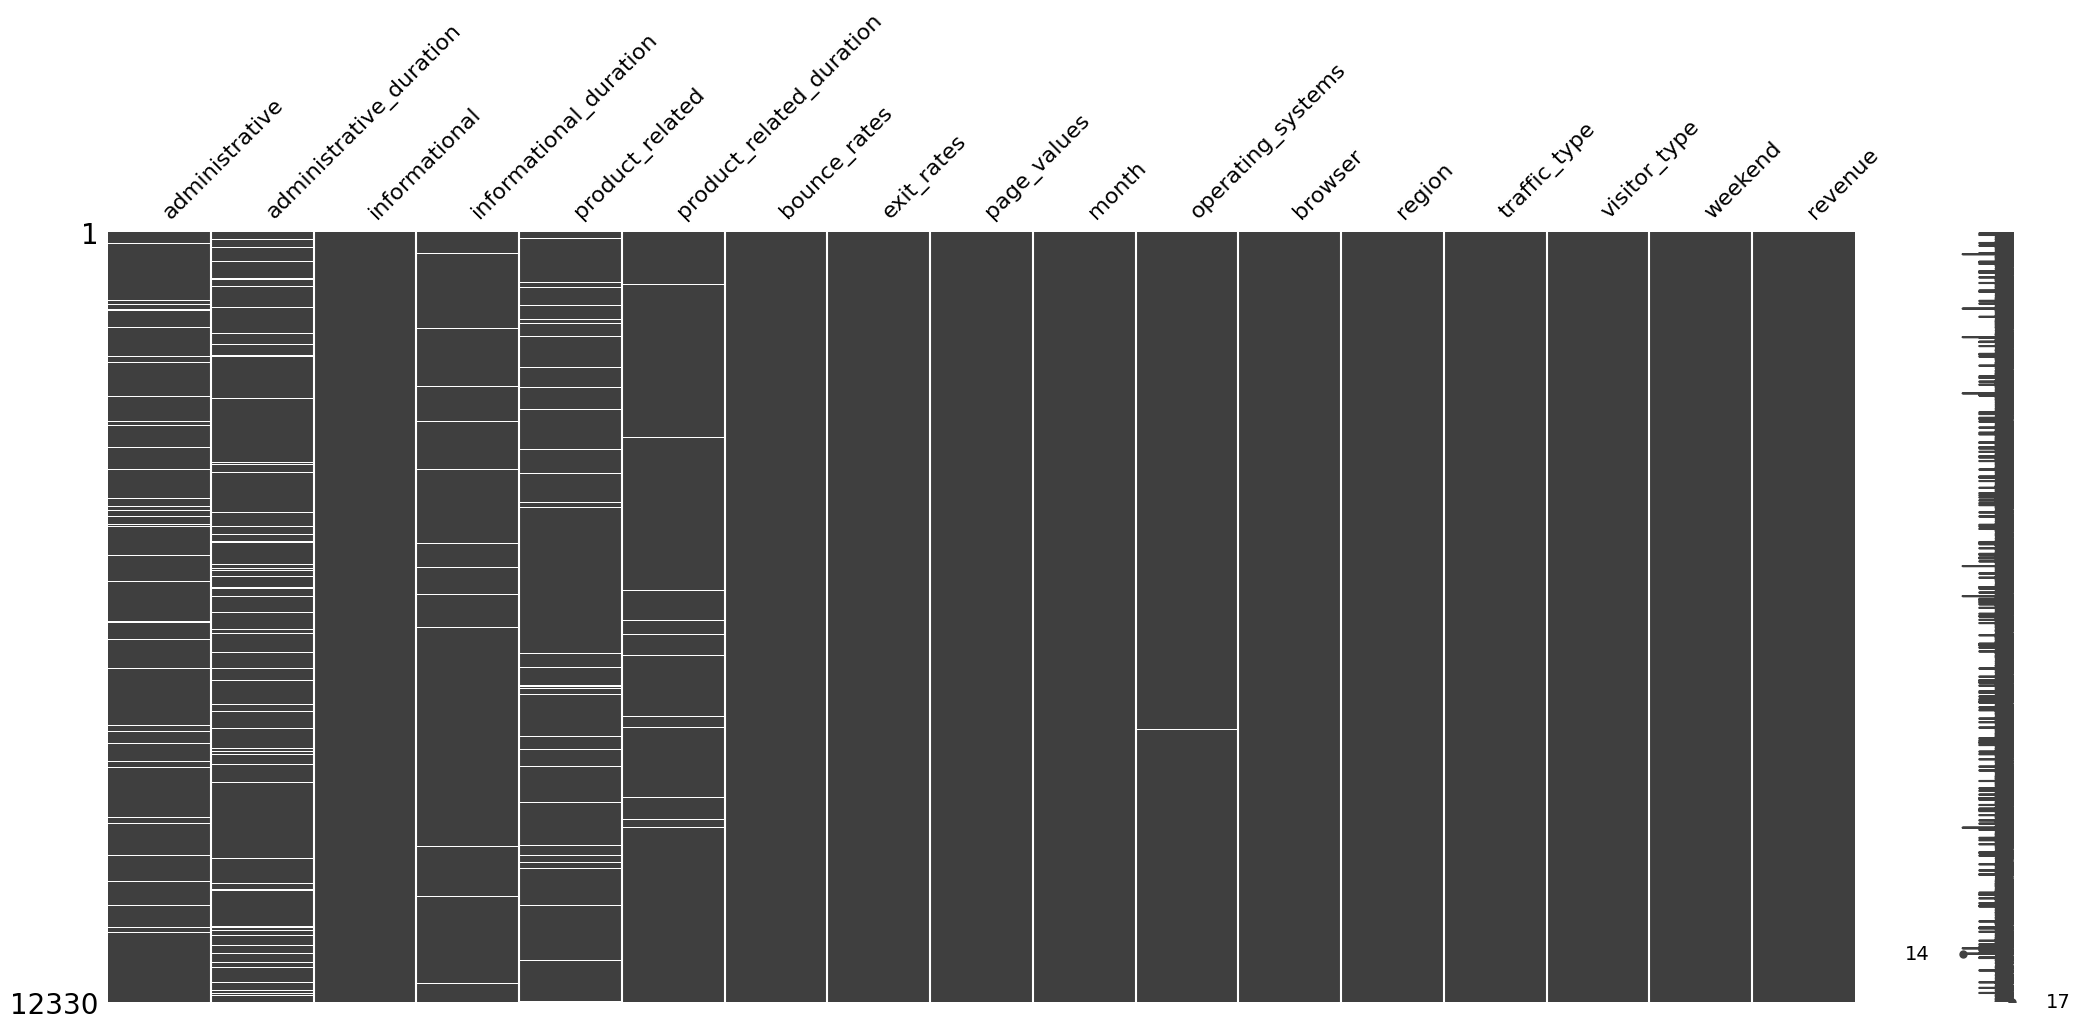

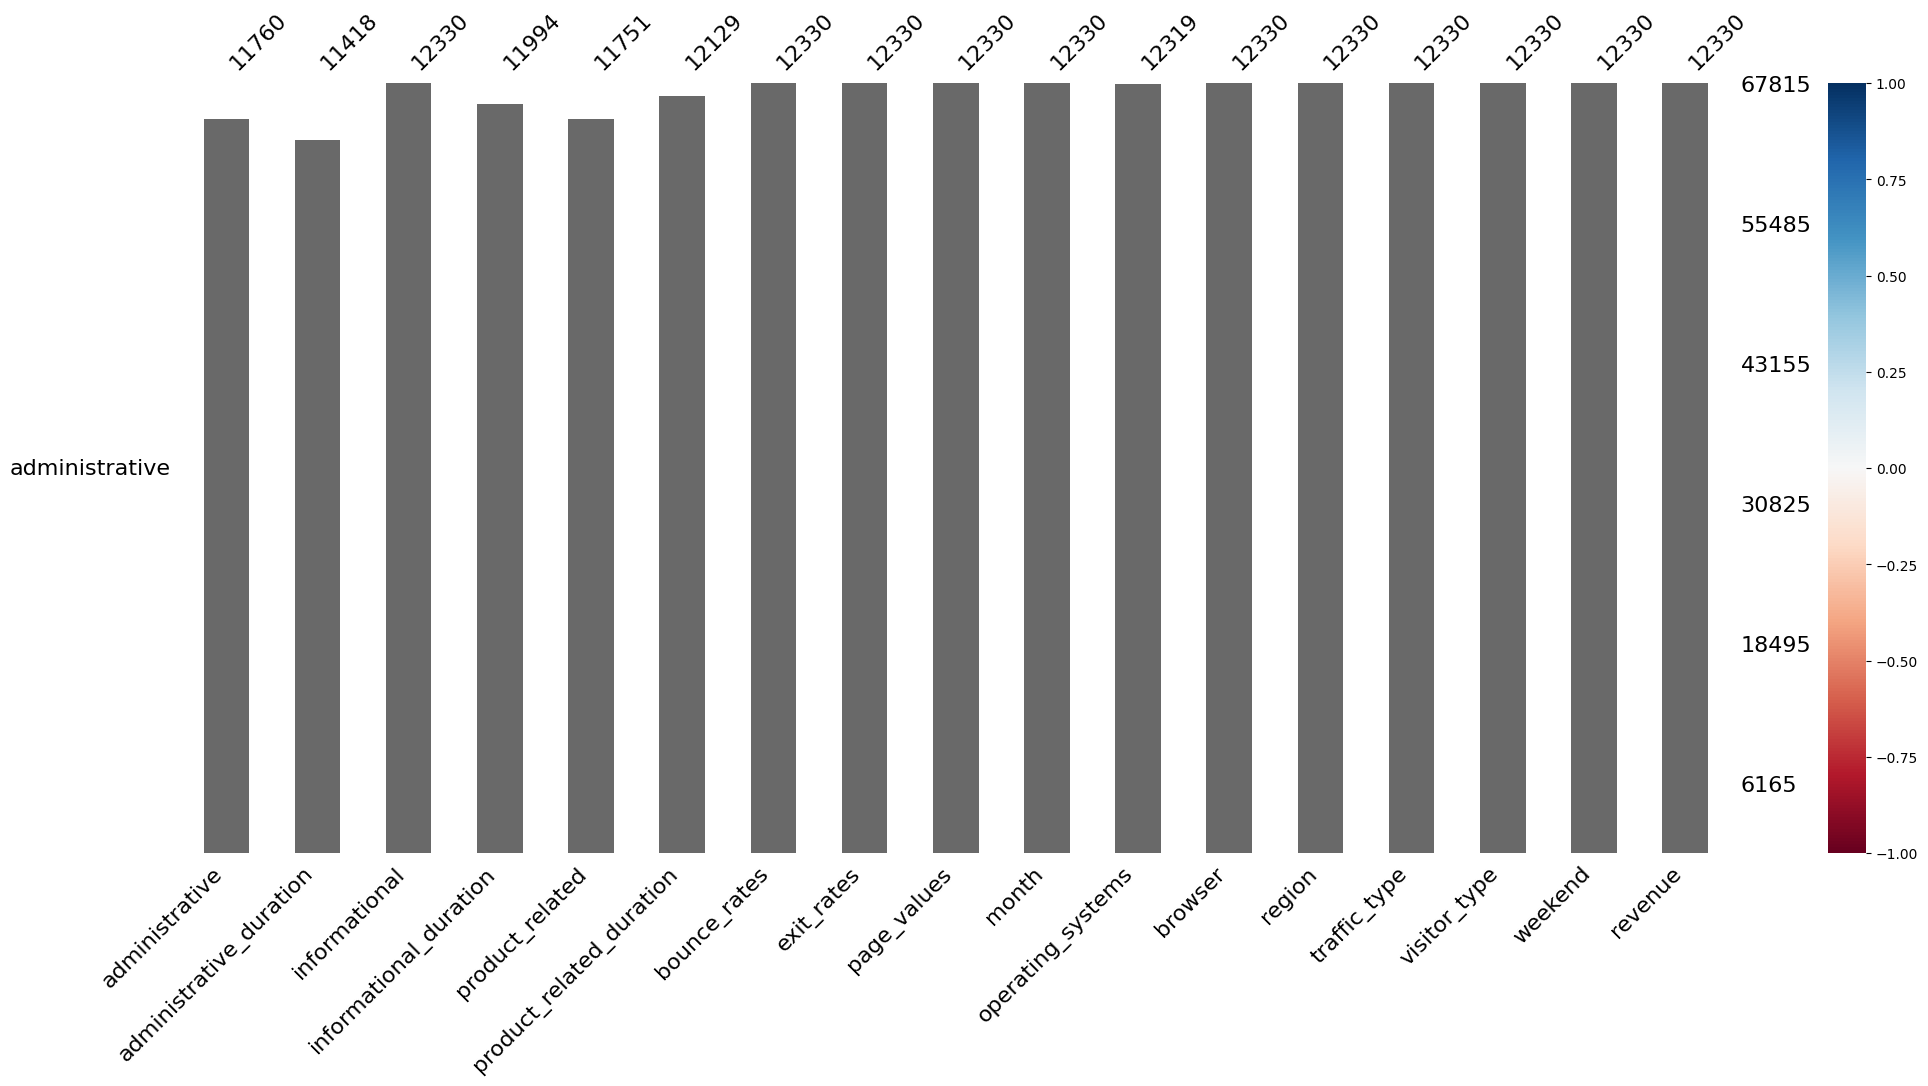

In [17]:
get_null_info(df)

#### Results:

Heatmap shows the correlation of missingness between every 2 columns.
- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

Therefore, there is no dependence between the occurence of missing values between any two variables. 